<a href="https://colab.research.google.com/github/blacktruth513/CodeStates_Project/blob/main/Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ruiqurm/lianjia
#!ls
!unzip lianjia.zip 

Saving kaggle.json to kaggle (6).json
lianjia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  lianjia.zip
replace new.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
# %%capture
# import sys

# if 'google.colab' in sys.modules:
#     # Install packages in Colab
#     !pip install category_encoders==2.*
#     !pip install eli5
#     !pip install pandas-profiling==2.*
#     !pip install pdpbox
#     !pip install shap

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./new.csv', encoding = 'GB2312',low_memory=False)  #GB/T 2312-1980 is a key official character set of the People's Republic of China, used for Simplified Chinese characters.
df

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,35.09,1,0,1,1,中 24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,中 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,178.34,4,2,1,2,中 5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [4]:
#실험용 데이터 카피 
df_copy = df.copy()
df_copy

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,35.09,1,0,1,1,中 24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,中 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,178.34,4,2,1,2,中 5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


# 데이터 설명

- 链家网是集房源信息搜索、产品研发、大数据处理、服务标准建立为一体的以数据驱动的全价值链房产服务平台。主营：二手房、租房、新房。您可通过小区找房，链家App等找房。 <br> 
:  "리엔지아"는 한국의 다방, 직방과 같은 중국의 대표적인 판매·임대·분양용 주택 공급 플랫폼으로 주요 영업(판매) 상품은 중고 주택, 새 주택, 렌트 등이 있다.

- Contents : Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com
- Inspiration : 
It may help you predict the housing price of Beijing.

#변수 설명

- url: the url which fetches the data
-id: the id of transaction
-Lng: and Lat coordinates, using the BD09 protocol.
-Cid: community id
-tradeTime: the time of transaction
-DOM: active days on market.Know more in https://en.wikipedia.org/wiki/ / Days_on_market / 부동산이 매물로 시장에 나와 있는 기간
-followers: the number of people follow the transaction. / 거래 참여자 수
-totalPrice: the total price
-price: the average price by square
-square: the square of house
-livingRoom: the number of living room
-drawingRoom: the number of drawing room
-kitchen: the number of kitchen
-bathroom the number of bathroom
-floor: the height of the house. I will turn the Chinese characters to English in the next version.
-buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ). / 범주형 
-constructionTime: the time of construction
-renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 ) / 범주형
-buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ). / 범주형
-ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
-elevator have ( 1 ) or not have elevator( 0 ) / 범주형
-fiveYearsProperty: It's related to China restricted purchase of houses policy / 범주형
-  Community average price / 지역 주택 평단가 가격

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [6]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [7]:
# 데이터 결측값 확인
df.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

In [8]:
################################################# 데이터 전처리 ####################################################### 

# 1) 변수에 포함되어 있는 한자 등 특수 문자 제거 ex) (高 ，中， 底 : 주택의 높이를 나타내는 한자)
df['floor'] = df['floor'].replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '') # 정규식 활용

# 2) 알 수 없는 관측치 제거  
#df['constructionTime'].value_counts() # 약 19,000개의 건축 연도를 알 수 없는 데이터 값이 있다. 데이터 수를 고려했을 때, 이 값들을 제거해도 된다고 판단 
df = df[~df['constructionTime'].isin(['未知'])]

# 3) 날짜형 컬럼 형 변환
df['tradeTime'] = pd.to_datetime(df['tradeTime'])

# 4) 컬럼에 포함되어 있는 결측값을 적절한 값 대체(DOM 컬럼에 대하여)
# Days_on_market(DOM)란, 부동산이 매물로 시장에 나와 있는 기간(단위 / 일)로서, 본 데이터에 포함되어 있는 해당 컬럼의 결측치가 약 15만개(데이터 절반)에 달해 이 값을 평균값으로 대체하여 연구에 사용할 수 있도록 했다.
df['DOM'].fillna(df['DOM'].mean(),inplace=True) 

# 5) 결측치 제거 / 나머지 컬럼의 결측값이 비교적 적으므로 영향이 적다고 판단하여 결측치를 제거
df = df.dropna(axis=0, how='any')

# 6) object형 자료형을 가진 컬럼에 대해 int형으로 형 변환
df['livingRoom'] = df['livingRoom'].astype('int64')
df['drawingRoom']= df['drawingRoom'].astype('int64')
df['bathRoom']= df['bathRoom'].astype('int64')
df['constructionTime'] = df['constructionTime'].astype('int64')
df['buildingType']= df['buildingType'].astype('int64') 
df['floor']= df['floor'].astype('int64') 

# 7) 거래날짜 별 데이터 순차 정렬
df = df.sort_values(by=['tradeTime'] ,ascending=True).reset_index()
df.drop('index', axis=1, inplace=True)

# 8) 분석에 영향력이 없다고 생각하는 변수 제거
df.drop(['url', 'id', 'Lng', 'Lat', 'Cid'], axis=1, inplace=True)

# 9) 화폐 단위 통일 (단위 가격 : 1만 위안, 예: totalPrice가 152.5면 1만배를 한 1,520,000위안이 총가격이다.)
df['totalPrice'] = (df['totalPrice'] * 10000)

# 10) 이상값 제거 
#타겟 변수 이상값 제거
df['totalPrice'] = df[df['totalPrice'] < np.percentile(df['totalPrice'], 99.5)]['totalPrice']
# # 특성 변수 이상값 제거(0.05% 극단값)
# df['price'] = df[df['price'] < np.percentile(df['price'], 99.5)]['price']
# df['square'] = df[df['square'] < np.percentile(df['square'], 99.5)]['square']
# df['communityAverage'] = df[df['communityAverage'] < np.percentile(df['communityAverage'], 99.5)]['communityAverage']

df = df.dropna(axis=0, how='any').reset_index()
df.drop('index', axis=1, inplace=True)

In [10]:
df

In [11]:
df.describe()

,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,296209.000000,296209.000000,2.962090e+05,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000,2.962090e+05,296209.000000,296209.000000,296209.000000,296209.000000,296209.000000
mean,29.310861,17.133659,3.419697e+06,43590.095331,82.029016,2.003656,1.167659,0.994345,1.176247,13.148881,3.027892,1999.164495,2.612834,4.414646,6.796374e+01,0.568912,0.652451,0.601410,6.748711,63502.852067
std,35.545087,34.715608,1.978960e+06,21536.958601,34.266784,0.757114,0.509980,0.101532,0.411275,7.756483,1.266195,8.766667,1.306824,1.909033,2.600897e+04,0.495229,0.476193,0.489609,2.816004,22010.390700
min,1.000000,0.000000,1.000000e+03,1.000000,7.370000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1950.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,6.000000,0.000000,2.050000e+06,28174.000000,57.900000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1994.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46410.000000
50%,29.527079,5.000000,2.940000e+06,38928.000000,73.780000,2.000000,1.000000,1.000000,1.000000,11.000000,4.000000,2001.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,29.527079,19.000000,4.250000e+06,53939.000000,97.900000,2.000000,1.000000,1.000000,1.000000,19.000000,4.000000,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75604.000000
max,1677.000000,1143.000000,1.409000e+07,150000.000000,509.980000,8.000000,5.000000,3.000000,7.000000,63.000000,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [12]:
df

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,2002-06-01,29.527079,0,1525000.0,17053,89.43,2,2,1,1,9,4,2009,1,6,0.333,1.0,0.0,0.0,6,47574.0
1,2002-07-06,29.527079,0,3250000.0,27041,120.19,3,1,1,1,26,1,2002,1,6,0.250,1.0,1.0,1.0,7,65595.0
2,2002-07-10,29.527079,0,1860000.0,14210,130.90,3,1,1,2,21,1,2001,1,6,0.333,1.0,0.0,1.0,7,43307.0
3,2003-07-31,29.527079,0,1607000.0,26923,59.69,2,1,1,1,28,1,2005,1,6,0.909,1.0,0.0,1.0,2,48853.0
4,2009-01-11,29.527079,0,1500000.0,26964,55.63,2,1,1,1,6,4,1992,1,2,0.250,0.0,1.0,0.0,10,77781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296204,2018-01-22,152.000000,98,2610000.0,37244,70.08,2,1,1,1,22,1,2010,4,6,0.200,1.0,1.0,1.0,7,39509.0
296205,2018-01-22,98.000000,112,8300000.0,51096,162.44,4,2,1,2,8,4,2009,4,6,0.500,1.0,1.0,0.0,8,63444.0
296206,2018-01-24,96.000000,1,4600000.0,76159,60.40,2,1,1,1,6,4,1986,3,2,0.500,0.0,1.0,1.0,8,78261.0
296207,2018-01-26,27.000000,0,4100000.0,63468,64.60,2,1,1,1,25,1,1995,1,6,0.250,1.0,0.0,1.0,2,60647.0


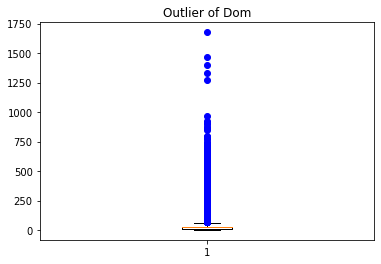

In [11]:
plt.title('Outlier of Dom')
plt.boxplot(df['DOM'], sym='bo')
plt.show()

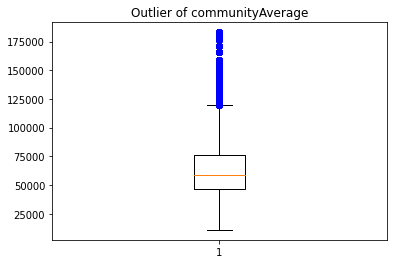

In [13]:
plt.title('Outlier of communityAverage')
plt.boxplot(df['communityAverage'], sym='bo')
plt.show()

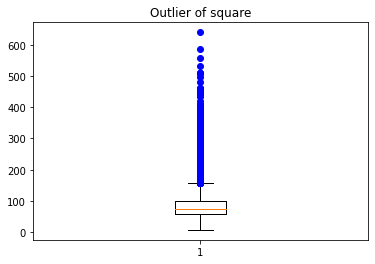

In [14]:
plt.title('Outlier of square')
plt.boxplot(df['square'], sym='bo')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297701 entries, 0 to 297700
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   tradeTime            297701 non-null  datetime64[ns]
 1   DOM                  297701 non-null  float64       
 2   followers            297701 non-null  int64         
 3   totalPrice           296209 non-null  float64       
 4   price                297701 non-null  int64         
 5   square               297701 non-null  float64       
 6   livingRoom           297701 non-null  int64         
 7   drawingRoom          297701 non-null  int64         
 8   kitchen              297701 non-null  int64         
 9   bathRoom             297701 non-null  int64         
 10  floor                297701 non-null  int64         
 11  buildingType         297701 non-null  int64         
 12  constructionTime     297701 non-null  int64         
 13  renovationCond

In [21]:
#완료된 정제 데이터 
df.isnull().sum()

tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

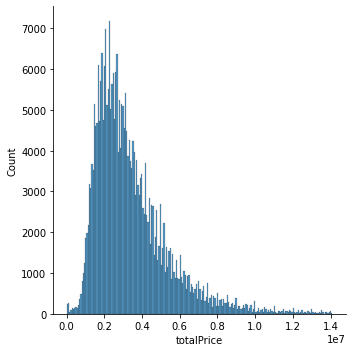

In [13]:
# 주요변수 분포도 확인 시각화
sns.displot(df['totalPrice']); #타겟 변수

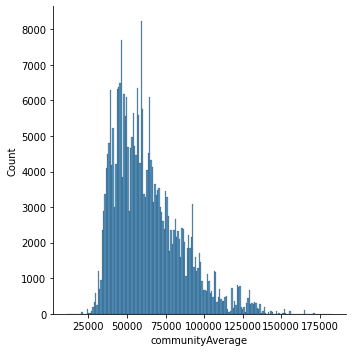

In [14]:
# 주요변수 분포도 확인 시각화
sns.displot(df['communityAverage']);

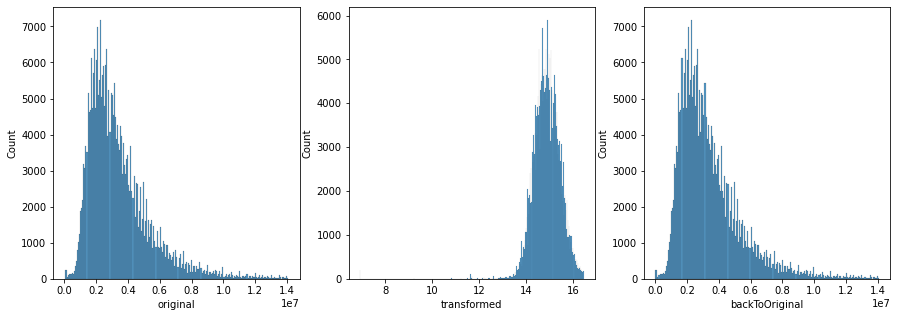

In [15]:
#로그변환을 통한 타겟변수 정규분포화
plots=pd.DataFrame()
plots['original']=df['totalPrice']
plots['transformed']=np.log1p(df['totalPrice'])
plots['backToOriginal']=np.expm1(np.log1p(df['totalPrice']))

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]);

- 분포를 로그변환했을 때 정규분포형에 가까워진 것을 알 수 있다. 

In [16]:
# 특성 간 상관 관계 분석 (수치형 변수) 
corr_df1 = df.corr(method='pearson') 
corr_df1 = corr_df1.loc['totalPrice']
corr_df1 = corr_df1.drop(['totalPrice']) #동일 변수 상관계수 drop

In [17]:
corr_top = pd.DataFrame(corr_df1.sort_values(ascending=False)) #시리즈 > DF化
corr_top

,totalPrice
price,0.661703
square,0.513621
communityAverage,0.433862
livingRoom,0.415224
bathRoom,0.385307
drawingRoom,0.305324
renovationCondition,0.277837
elevator,0.211668
buildingStructure,0.198461
DOM,0.178259


- 상관관계 분석 결과 : price - square - communityAverage 순으로 높은 상관관계를 보이고 있으며 상관관계가 상대적으로 낮은 변수들에 대해 분석에 사용 여부를 정할 필요성이 있다고 판단했다. / 분석 요소 : target 변수인 totalprice에 대해 price 변수는 totalprice를 square 값으로 나눠 만든 변수이므로 상관관계와 인과관계에 대해 생각해봐야한다. 

In [18]:
# 타겟변수 - 주요 특성 간 산점도 시각화 (상관관계 분석 결과를 바탕으로)
df_sample1 = df[['totalPrice','price', 'square', 'communityAverage', 'bathRoom', 'livingRoom',  'drawingRoom', 'renovationCondition']]

In [ ]:
sns.pairplot(df_sample1)
plt.show()

In [ ]:
#!pip3 install statsmodels

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [20]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_sample1.values, i) for i in range(df_sample1.shape[1])]
vif["features"] = df_sample1.columns
vif

,VIF Factor,features
0,18.682651,totalPrice
1,27.104355,price
2,40.555138,square
3,15.474535,communityAverage
4,19.102294,bathRoom
5,16.380173,livingRoom
6,10.169860,drawingRoom
7,5.359618,renovationCondition


- 다중공선성(VIF) 확인 결과 주요 변수에서 기준값인 10을 초과하는 수치를 보여 정규화 등의 조치를 시행할 필요성이 보인다 . cf) 다중공선성(Multicollinearity) : 독립 변수간 상관 관계를 보이는 것.

In [ ]:
#데이터셋 분할 / 거래 날짜가 순차적으로 있는 시계열 데이터임을 고려할 때 데이터의 시간 흐름에 맞게 데이터를 분할함.  (학습/검증/테스트 6:2:2의 비율로 분할)



In [ ]:
# 타겟변수 분포 확인  
